In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [4]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [8]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  13
train accuracy :  0.996875
test accuracy :  0.85


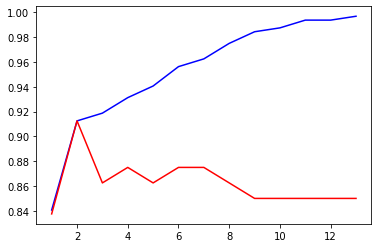

In [28]:
train_scores = []
test_scores = []
for d in range(1, 14):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 14, 1), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 14, 1), np.array(test_scores), 'r-')

In [32]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)
print('max depth : ', clf.tree_.max_depth)
print('train accuracy : ', clf.score(X_train, y_train))
print('test accuracy : ', clf.score(X_test, y_test))

max depth :  2
train accuracy :  0.9125
test accuracy :  0.9125


# Visualization

In [30]:
from sklearn.tree import export_text

In [33]:
print(export_text(clf,
                  feature_names=['Gender', 'Age', 'EstimatedSalary']))

|--- Age <= 42.50
|   |--- EstimatedSalary <= 89500.00
|   |   |--- class: 0
|   |--- EstimatedSalary >  89500.00
|   |   |--- class: 1
|--- Age >  42.50
|   |--- Age <= 46.50
|   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- class: 1



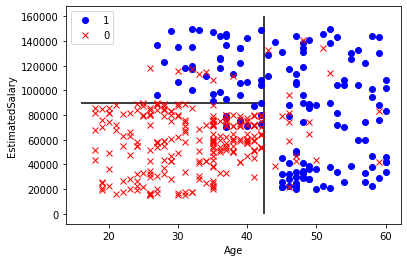

In [18]:
plt.plot(df[df['Purchased'] == 1]['Age'],
         df[df['Purchased'] == 1]['EstimatedSalary'], 'bo', label='1')

plt.plot(df[df['Purchased'] == 0]['Age'],
         df[df['Purchased'] == 0]['EstimatedSalary'], 'rx', label='0')

plt.vlines(42.5, 0, 160000)
plt.hlines(89500, 16, 42.5)

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [19]:
from sklearn.tree import export_graphviz

In [34]:
export_graphviz(clf,
                out_file='DT.dot',
                feature_names=['Gender', 'Age', 'EstimatedSalary'],
                filled=True, class_names=['False', 'True'])

In [35]:
!dot -Tpng DT.dot -o DT.png